# Exploration du DF d'index

In [12]:
import pandas as pd

df = pd.read_csv('Path_DF.csv')
df.head()

,Path,Machine_Type,Dataset,Status,Machine_ID,Sample_ID,nb_echantillon,freq_echantillonnage
0,Data\fan\test\anomaly_id_00_00000000.wav,fan,test,anomaly,0,0,160000,16000
1,Data\fan\test\anomaly_id_00_00000001.wav,fan,test,anomaly,0,1,160000,16000
2,Data\fan\test\anomaly_id_00_00000002.wav,fan,test,anomaly,0,2,160000,16000
3,Data\fan\test\anomaly_id_00_00000003.wav,fan,test,anomaly,0,3,160000,16000
4,Data\fan\test\anomaly_id_00_00000004.wav,fan,test,anomaly,0,4,160000,16000


In [13]:
df.duplicated().sum() #aucune donnée en doublon

0

In [3]:
df.isna().sum() #aucune valeur nulle

Path                    0
Machine_Type            0
Dataset                 0
Status                  0
Machine_ID              0
Sample_ID               0
nb_echantillon          0
freq_echantillonnage    0
dtype: int64

In [4]:
df.shape 
# 30 987 prises de son avec leur path 
# et 5 paramètres pour une identification unique de chaque fichier

(30987, 8)

In [5]:
print('Répartition des prises de son\n'+
      str(df.Machine_Type.value_counts()))

Répartition des prises de son
ToyConveyor    6509
ToyCar         6459
fan            5550
pump           4205
valve          4170
slider         4094
Name: Machine_Type, dtype: int64


In [6]:
df.freq_echantillonnage.value_counts()

# La fréquence d'échantillonnage est la même pour tous : 16 kHz. 

16000    30987
Name: freq_echantillonnage, dtype: int64

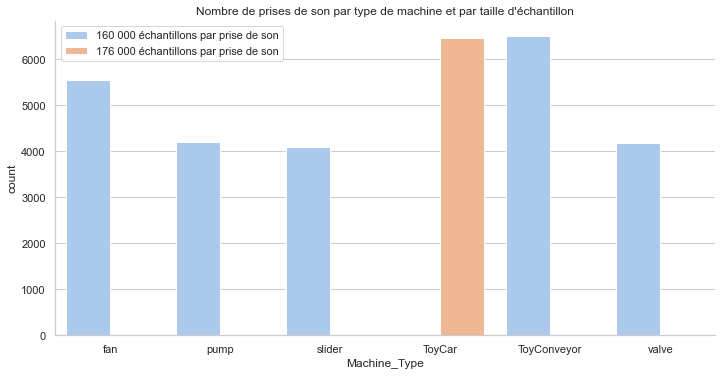

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set(style="whitegrid",palette="pastel")
sns.catplot(data=df,
            x='Machine_Type',
            hue='nb_echantillon',
            palette="pastel",
            height=5,
            aspect=2,
            kind='count',
            legend=False)

plt.legend(['160 000 échantillons par prise de son','176 000 échantillons par prise de son'])
plt.title("Nombre de prises de son par type de machine et par taille d'échantillon")
plt.show()

# Les audios ont tous 160 000 échantillons, sauf ceux de ToyCar qui en ont 176 000. 
# Ainsi les audios durent 10 secondes, sauf ceux de ToyCar (11 secondes).

In [8]:
print('Répartition des prises de son de test \n'+
      str(df[df['Dataset']=='test'].Machine_Type.value_counts()),
      '\n',
      '\nRépartition des prises de son d\'entraînement\n'+
      str(df[df['Dataset']=='train'].Machine_Type.value_counts()))



Répartition des prises de son de test 
ToyConveyor    3509
ToyCar         2459
fan            1875
slider         1290
valve           879
pump            856
Name: Machine_Type, dtype: int64 
 
Répartition des prises de son d'entraînement
ToyCar         4000
fan            3675
pump           3349
valve          3291
ToyConveyor    3000
slider         2804
Name: Machine_Type, dtype: int64


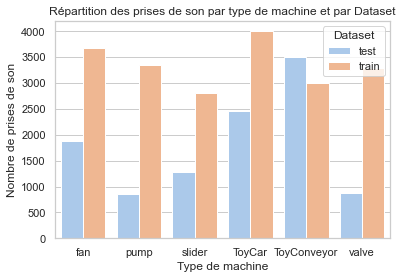

In [9]:
sns.countplot(data=df,x='Machine_Type',hue='Dataset', palette="pastel")
plt.title('Répartition des prises de son par type de machine et par Dataset')
plt.xlabel('Type de machine')
plt.ylabel('Nombre de prises de son')
plt.show()

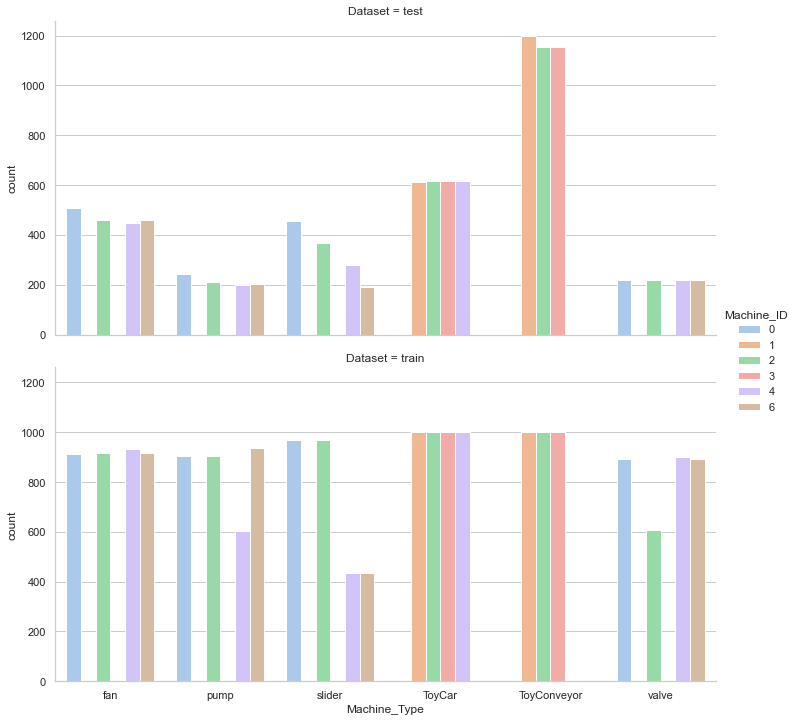

In [10]:
sns.catplot(data=df,
            x='Machine_Type',
            hue='Machine_ID',
            row='Dataset',
            palette="pastel",height=5,aspect=2,kind='count')
plt.show()

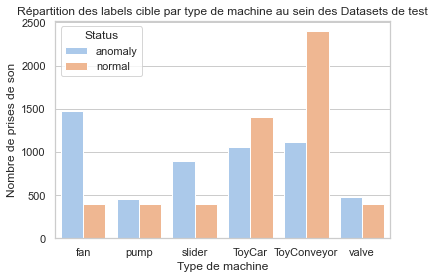

In [11]:
sns.countplot(data=df[df['Dataset']=='test'],
            x='Machine_Type',
            hue='Status')
plt.title('Répartition des labels cible par type de machine au sein des Datasets de test')
plt.xlabel('Type de machine')
plt.ylabel('Nombre de prises de son')
plt.show()